2020-07-24 12:58:18


C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor 

Text(0.5, 0, 'Relative expression')

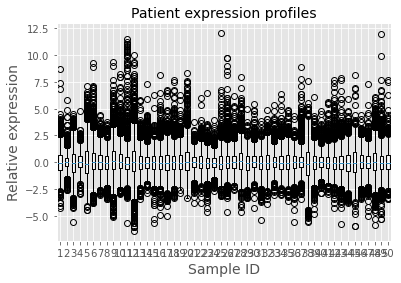

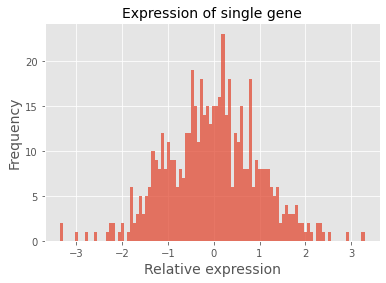

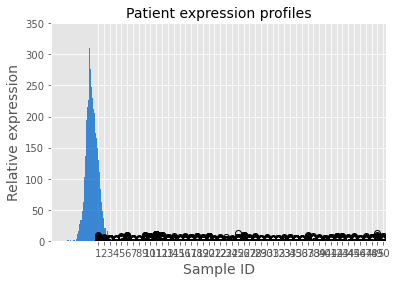

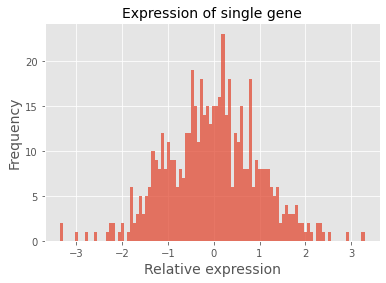

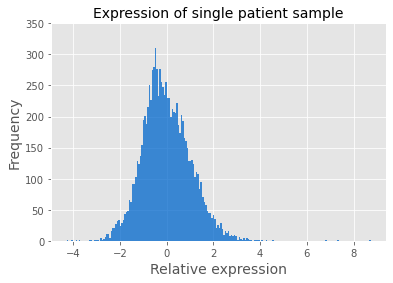

In [31]:
import sys
import os
os.chdir('E:\ISB work stuff\Post-Doc_BaligaLab_GBMSYGNALProject')
import numpy as np
import pandas as pd
from scipy import stats
from numpy import random as rd
import re
import subprocess
import json
from sklearn.decomposition import PCA
import multiprocessing, multiprocessing.pool
import matplotlib.pyplot as plt
import seaborn as sns
import time,datetime
from collections import Counter
from sklearn.manifold import TSNE
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree
import miner_py3_kk as miner
import imp
imp.reload(miner)
%matplotlib inline
plt.style.use('ggplot')
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

    
## User defined variables
inputDataFile1='GbmTCGALowessMicroarrayFilteredWithIDs.csv'
inputDataFile2='GbmTCGATMMRNASeqFilteredWithGeneIDs.csv'

resultsDirectory='E:/ISB work stuff/Post-Doc_BaligaLab_GBMSYGNALProject/GBM/results/MINER/MINER_MicroLowessRNATMM.07.23.2020'
if not os.path.isdir(resultsDirectory):
    os.mkdir(resultsDirectory)
    
## Read expression data and conversion table        
expressionData1=pd.read_csv(inputDataFile1,header=0,index_col=0,sep=",")
expressionData2=pd.read_csv(inputDataFile2,header=0,index_col=0,sep=",")
cols_micro = set(expressionData1.columns)
cols_rna = set(expressionData2.columns)
cols_common = list(cols_rna.intersection(cols_micro))
cols_mrnaonly = list(cols_rna.difference(cols_micro))
cols_microonly = list(cols_micro.difference(cols_rna))
expressionData_rna = expressionData2[cols_mrnaonly+cols_common]
expressionData_micro = expressionData1[cols_microonly] 
expressionData = pd.merge(expressionData_rna, expressionData_micro, left_index = True, right_index = True)
expressionData.to_csv("GbmMicroRNAMergedWithIDs.csv")
    
    
individual_expression_data = [expressionData.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",FontSize=14)
plt.ylabel("Relative expression",FontSize=14)
plt.xlabel("Sample ID",FontSize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,350)
plt.title("Expression of single patient sample",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)
    
##visualize pre-processed expression data
individual_expression_data = [expressionData.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",FontSize=14)
plt.ylabel("Relative expression",FontSize=14)
plt.xlabel("Sample ID",FontSize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,350)
plt.title("Expression of single patient sample",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)

# Gene expression clustering

0.00 percent complete
['ENSG00000283494', 'ENSG00000283350', 'ENSG00000281861', 'ENSG00000281775', 'ENSG00000281244', 'ENSG00000280908', 'ENSG00000278415', 'ENSG00000278232', 'ENSG00000278195', 'ENSG00000277044', 'ENSG00000276559', 'ENSG00000276497', 'ENSG00000275365', 'ENSG00000273079', 'ENSG00000265203', 'ENSG00000263324', 'ENSG00000213578', 'ENSG00000198910', 'ENSG00000198691', 'ENSG00000198216', 'ENSG00000197901', 'ENSG00000197893', 'ENSG00000197714', 'ENSG00000197465', 'ENSG00000197181', 'ENSG00000189108', 'ENSG00000188778', 'ENSG00000186862', 'ENSG00000184984', 'ENSG00000184845', 'ENSG00000184349', 'ENSG00000184185', 'ENSG00000184156', 'ENSG00000184058', 'ENSG00000183837', 'ENSG00000183785', 'ENSG00000182674', 'ENSG00000181072', 'ENSG00000180549', 'ENSG00000179477', 'ENSG00000179148', 'ENSG00000178732', 'ENSG00000178562', 'ENSG00000178502', 'ENSG00000178342', 'ENSG00000177000', 'ENSG00000176928', 'ENSG00000176920', 'ENSG00000176884', 'ENSG00000176678', 'ENSG00000176383', 'ENSG000

C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor 

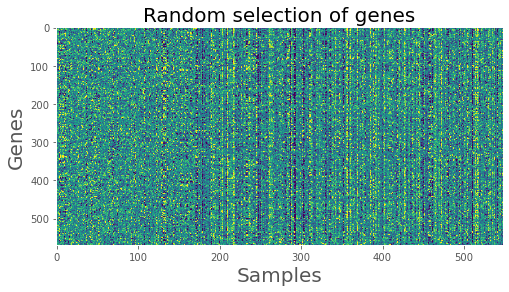

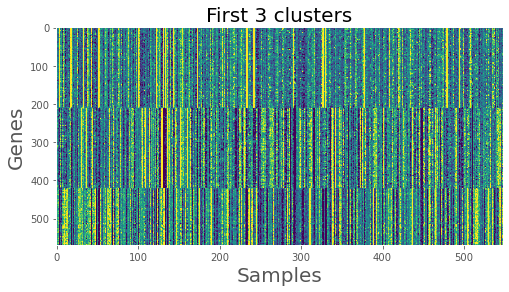

In [32]:
# minimum number of genes that form an acceptable coexpression cluster:
minNumberGenes = 6 #bulk RNAseq default=6;single cell RNAseq default=6

# minimum correlation coefficient for an acceptable regulator-cluster association 
minCorrelation = 0.2 #bulk RNAseq default=0.2;single cell RNAseq default=0.05

# minimum number of genes that form an acceptable coexpression cluster and have share binding site for regulator:
minNumberRegulonGenes = 5 #bulk RNAseq default=5;single cell RNAseq default=4

# choose database: if supplying your own database, use mechanistic_database = reference_mechanistic_database
mechanistic_database = "tfbsdb_tf_to_genes.pkl" #default option
#mechanistic_database = reference_mechanistic_database #use if supplying your own database

# number of cores available for multiprocessing
import multiprocessing
numCores = multiprocessing.cpu_count()

# Network inference may take several minutes. 
# Prompts will print at 0, 20, 40, 60, 80, and 100% complete

t1 = time.time() 
# generate a list of coexpressed gene clusters, all of which have length >= minNumberGenes
initialClusters = miner.cluster(expressionData,minNumberGenes = minNumberGenes,minNumberOverExpSamples=4,maxSamplesExcluded=0.50,random_state=17,overExpressionThreshold=80) 
# revise initialClusters to combine highly correlated clusters and keep only those with significant coexpression
revisedClusters = miner.reviseInitialClusters(initialClusters,expressionData)

# write revisedClusters to .json file
miner.write_json(revisedClusters,os.path.join(resultsDirectory,"coexpressionDictionary.json"))
t2 = time.time()
print("Completed coexpression clustering in {:.2f} minutes".format((t2-t1)/60.))

# retrieve first three clusters for visual inspection
first_clusters = np.hstack([revisedClusters[i] for i in np.arange(3).astype(str)])

# visualize background expression
plt.figure(figsize=(8,4))
plt.imshow(expressionData.loc[np.random.choice(
    expressionData.index,len(first_clusters),
    replace=False),:],aspect="auto",cmap="viridis",vmin=-1,vmax=1)
plt.grid(False)
plt.ylabel("Genes",FontSize=20)
plt.xlabel("Samples",FontSize=20)
plt.title("Random selection of genes",FontSize=20)

# visualize first 10 clusters
plt.figure(figsize=(8,4))
plt.imshow(expressionData.loc[first_clusters,:],aspect="auto",cmap="viridis",vmin=-1,vmax=1)
plt.grid(False)
plt.ylabel("Genes",FontSize=20)
plt.xlabel("Samples",FontSize=20)
plt.title("First 3 clusters",FontSize=20)

# report coverage
print("Number of genes clustered: {:d}".format(len(set(np.hstack(initialClusters)))))
print("Number of unique clusters: {:d}".format(len(revisedClusters)))

t3 = time.time()
print("Completed clustering module in {:.2f} minutes".format((t3-t1)/60.))


# Mechanistic inference

In [33]:
imp.reload(miner)
t1 = time.time()
# get first principal component axes of clusters
axes = miner.principalDf(revisedClusters,expressionData,subkey=None,minNumberGenes=1)
# analyze revised clusters for enrichment in relational database (default: transcription factor binding site database)
mechanisticOutput = miner.mechanisticInference(axes,revisedClusters,expressionData,correlationThreshold=minCorrelation,numCores=numCores,database=mechanistic_database)
# write mechanistic output to .json file
miner.write_json(mechanisticOutput,os.path.join(resultsDirectory,"mechanisticOutput.json"))
# order mechanisticOutput as {tf:{coexpressionModule:genes}} 
coregulationModules = miner.getCoregulationModules(mechanisticOutput)
# write coregulation modules to .json file
miner.write_json(coregulationModules,os.path.join(resultsDirectory,"coregulationModules.json"))
# get final regulons by keeping genes that requently appear coexpressed and associated to a common regulator
regulons = miner.getRegulons(coregulationModules,minNumberGenes=minNumberRegulonGenes,freqThreshold = 0.333)
# reformat regulon dictionary for consistency with revisedClusters and coexpressionModules
regulonModules, regulonDf = miner.regulonDictionary(regulons)
# write regulonDf to csv using preferred gene name identifiers
regulonDf.to_csv(os.path.join(resultsDirectory,"regulonDf.csv"))
# write regulons to json file
miner.write_json(regulonModules,os.path.join(resultsDirectory,"regulons.json"))
# define coexpression modules as composite of coexpressed regulons
coexpressionModules = miner.getCoexpressionModules(mechanisticOutput)
# write coexpression modules to .json file
miner.write_json(coexpressionModules,os.path.join(resultsDirectory,"coexpressionModules.json"))
# Get eigengenes for all modules
eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
#write eigengenes to .csv
eigengenes.to_csv(os.path.join(resultsDirectory,"eigengenes.csv"))

t2 = time.time()
print("Completed mechanistic inference in {:.2f} minutes".format((t2-t1)/60.))
print("Inferred network with {:d} regulons, {:d} regulators, and {:d} co-regulated genes".format(len(regulonDf.Regulon_ID.unique()),len(regulonDf.Regulator.unique()),len(regulonDf.Gene.unique())))

Running mechanistic inference


C:\Users\kkavy\miner_py3_kk.py:1284: RuntimeWarning: invalid value encountered in greater_equal
  tfDict[tfDict_key] = tfs[np.where(np.abs(tfCorrelation)>=correlationThreshold)[0]]


['ENSG00000008056', 'ENSG00000127561', 'ENSG00000124140', 'ENSG00000108309', 'ENSG00000033627', 'ENSG00000089199', 'ENSG00000278268', 'ENSG00000276781', 'ENSG00000068383', 'ENSG00000115419', 'ENSG00000171532', 'ENSG00000168490', 'ENSG00000143153', 'ENSG00000171617', 'ENSG00000085788', 'ENSG00000125851', 'ENSG00000164076', 'ENSG00000198932', 'ENSG00000276734', 'ENSG00000132639', 'ENSG00000135625', 'ENSG00000182389', 'ENSG00000164600', 'ENSG00000126214', 'ENSG00000156011', 'ENSG00000130294', 'ENSG00000065154', 'ENSG00000108924', 'ENSG00000100285', 'ENSG00000139190', 'ENSG00000196581', 'ENSG00000278165', 'ENSG00000198794', 'ENSG00000047249', 'ENSG00000069712', 'ENSG00000186487', 'ENSG00000164061', 'ENSG00000130540', 'ENSG00000128245']
['ENSG00000158270', 'ENSG00000171992', 'ENSG00000122861', 'ENSG00000072110', 'ENSG00000168610']
['ENSG00000146278', 'ENSG00000144747', 'ENSG00000156273', 'ENSG00000005889', 'ENSG00000140299']
['ENSG00000133961', 'ENSG00000185499', 'ENSG00000013588', 'ENSG000

# Causal Inference

In [36]:
imp.reload(miner)
# Load mutation matrices
common_mutations_file = os.path.join("SignificantSomaticMutationsGbmRNAAndMicroarray07242020.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
# Perform causal analysis for each mutation matrix
mut_matrix = common_mutations.copy()
referenceDictionary = regulons
referenceRegulonDf = regulonDf
referenceDf = eigengenes
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

common_mutations_file = os.path.join("NonSilentPathwayMutationsGbmRNAAndMicroarray07242020.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

common_mutations_file = os.path.join("mutations.GBM.TCGA.2019.05.01.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

# compile all causal results
causal_directory = os.path.join(resultsDirectory,"causal_analysis")
causal_results = miner.readCausalFiles(causal_directory)
causal_results.to_csv(os.path.join(resultsDirectory,"completeCausalResults.csv"))
causal_results.head()
# filtered causal results
causal_results_regulon_filtered = causal_results[causal_results["-log10(p)_Regulon_stratification"]>=-np.log10(0.05)]
causal_results_aligned = causal_results_regulon_filtered[causal_results_regulon_filtered.Fraction_of_edges_correctly_aligned>=0.5]
causal_results_aligned_correlated = causal_results_aligned[causal_results_aligned["RegulatorRegulon_Spearman_p-value"]<=0.05]
causal_results_stratified_aligned_correlated = causal_results_aligned_correlated[causal_results_aligned_correlated["-log10(p)_MutationRegulatorEdge"]>=-np.log10(0.05)]

# for all causal flows, 
# the regulon is differentially active w.r.t the mutation,
# the regulator is differentially active w.r.t the mutation,
# the regulator is significantly correlated to the regulon,
# and the directionality of at least half of the differentially active targets 
# downstream of the regulator are consistent with the perturbation from the mutation

causal_results_stratified_aligned_correlated.to_csv(os.path.join(resultsDirectory,"filteredCausalResults.csv"))

completed causal analysis in 1.01 minutes
completed causal analysis in 2.35 minutes
completed causal analysis in 30.85 minutes


# Network Mapping

In [37]:
t1 = time.time()
# select reference dictionary for downstream analysis (revisedClusters, coexpressionModules, or regulonModules)
referenceDictionary = regulonModules
# create a background matrix used for statistical hypothesis testing
bkgd = miner.backgroundDf(expressionData)
# for each cluster, give samples that show high coherent cluster activity
overExpressedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=2,p=0.05)
# for each clus|ter, give samples that show low coherent cluster activity
underExpressedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=0,p=0.05)
# for each cluster, give samples that do not show coherent cluster activity
# dysregulatedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label="excluded")
# # for each cluster, give samples that show coherent cluster activity, despite magnitude of expression
# coherentMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label="included")

# write membership matrices to .csv file
overExpressedMembersMatrix = miner.membershipToIncidence(overExpressedMembers,expressionData)
overExpressedMembersMatrix.to_csv(os.path.join(resultsDirectory,"overExpressedMembers.csv"))
underExpressedMembersMatrix = miner.membershipToIncidence(underExpressedMembers,expressionData)
underExpressedMembersMatrix.to_csv(os.path.join(resultsDirectory,"underExpressedMembers.csv"))
# dysregulatedMembersMatrix = miner.membershipToIncidence(dysregulatedMembers,expressionData)
# dysregulatedMembersMatrix.to_csv(os.path.join(resultsDirectory,"dysregulatedMembers.csv"))
# coherentMembersMatrix = miner.membershipToIncidence(coherentMembers,expressionData)
# coherentMembersMatrix.to_csv(os.path.join(resultsDirectory,"coherentMembers.csv"))

t2 = time.time()
print("Completed patient mapping in {:.2f} minutes".format((t2-t1)/60.))

done!
done!
Completed patient mapping in 1.22 minutes


C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\kkavy\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


Text(0.5, 0, 'Samples')

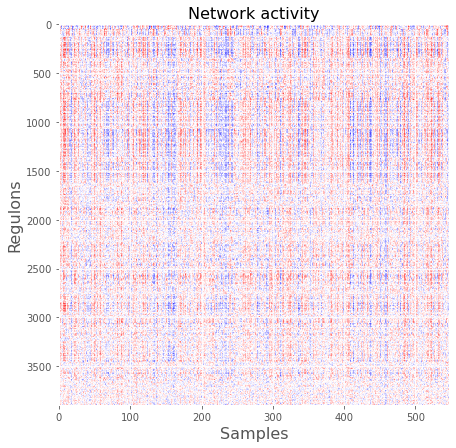

In [39]:
#visualize network activity across individual samples
plt.figure(figsize=(7,7))
network_activity_heatmap = overExpressedMembersMatrix-underExpressedMembersMatrix
plt.imshow(network_activity_heatmap,cmap="bwr",vmin=-1,vmax=1,aspect="auto")
plt.title("Network activity",FontSize=16)
plt.ylabel("Regulons",FontSize=16)
plt.xlabel("Samples",FontSize=16)

# Infer patient sub-types

In [40]:
# Infer transcriptional states
imp.reload(miner)
minClusterSize = int(np.ceil(0.01*expressionData.shape[1]))
referenceMatrix = overExpressedMembersMatrix-underExpressedMembersMatrix
primaryMatrix = overExpressedMembersMatrix
primaryDictionary = overExpressedMembers
secondaryMatrix = underExpressedMembersMatrix
secondaryDictionary = underExpressedMembers

states, centroidClusters = miner.inferSubtypes(referenceMatrix,primaryMatrix,secondaryMatrix,primaryDictionary,secondaryDictionary,minClusterSize = int(np.ceil(0.01*expressionData.shape[1])),restricted_index=None)
states_dictionary = {str(i):states[i] for i in range(len(states))}
print(states_dictionary)
miner.write_json(states_dictionary,os.path.join(resultsDirectory,"transcriptional_states.json"))

Beginning subtype inference
completed subtype inference in 1.17 minutes
{'0': ['TCGA-06-0211.1', 'TCGA-06-0210.1', 'TCGA-02-0055', 'TCGA-06-0125.1', 'TCGA-19-4065', 'TCGA-06-0190.1', 'TCGA-19-4065.1', 'TCGA-28-5218', 'TCGA-28-1753', 'TCGA-06-0171', 'TCGA-14-0781', 'TCGA-32-2632', 'TCGA-06-0644', 'TCGA-76-4928', 'TCGA-06-0168', 'TCGA-14-1034', 'TCGA-06-0130', 'TCGA-14-0789', 'TCGA-32-2615', 'TCGA-41-4097', 'TCGA-27-2519', 'TCGA-16-1045', 'TCGA-76-4927', 'TCGA-27-2524', 'TCGA-06-0649', 'TCGA-27-1830', 'TCGA-27-1832', 'TCGA-06-0882', 'TCGA-14-1823', 'TCGA-06-5414', 'TCGA-06-5410', 'TCGA-02-2486', 'TCGA-19-1389', 'TCGA-32-2638', 'TCGA-32-1980', 'TCGA-06-0878', 'TCGA-32-4213', 'TCGA-06-0750', 'TCGA-28-2513', 'TCGA-26-5135', 'TCGA-28-5213', 'TCGA-32-1982', 'TCGA-06-0210', 'TCGA-06-0156', 'TCGA-06-2562', 'TCGA-06-0184', 'TCGA-06-0141', 'TCGA-06-0152', 'TCGA-06-0646', 'TCGA-06-5412', 'TCGA-06-5418', 'TCGA-41-3915', 'TCGA-06-0138', 'TCGA-12-0619', 'TCGA-06-0132', 'TCGA-06-0645', 'TCGA-14-0817',

# Transcriptional programs

C:\Users\kkavy\miner_py3_kk.py:2033: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Regulons",FontSize=14)
C:\Users\kkavy\miner_py3_kk.py:2034: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Samples",FontSize=14)


{'0': ['13', '83', '139', '162', '169', '186', '195', '198', '205', '214', '219', '229', '253', '278', '284', '309', '315', '323', '343', '386', '396', '410', '425', '522', '680', '705', '785', '786', '788', '809', '821', '825', '828', '839', '840', '865', '875', '882', '884', '886', '911', '912', '937', '941', '943', '953', '960', '975', '979', '998', '1005', '1018', '1021', '1028', '1046', '1051', '1065', '1076', '1092', '1095', '1106', '1112', '1122', '1126', '1132', '1142', '1167', '1175', '1183', '1184', '1190', '1192', '1195', '1201', '1207', '1215', '1221', '1225', '1229', '1231', '1233', '1235', '1241', '1243', '1251', '1276', '1279', '1300', '1305', '1312', '1315', '1319', '1321', '1326', '1329', '1338', '1347', '1349', '1357', '1369', '1394', '1408', '1416', '1431', '1432', '1434', '1459', '1462', '1468', '1476', '1481', '1487', '1507', '1510', '1524', '1546', '1558', '1568', '1570', '1584', '1586', '1600', '1603', '1609', '1634', '1677', '1678', '1684', '1707', '1743', '1774

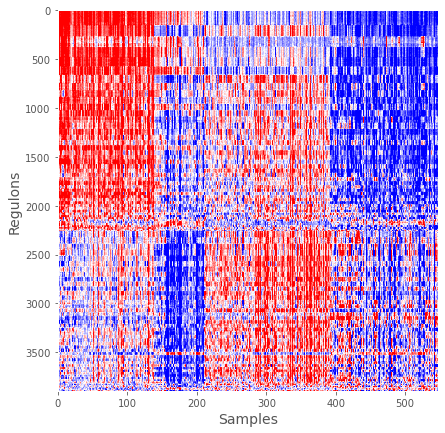

In [41]:
# Infer transcriptional programs
reference_df = eigengenes.copy()
programs, _ = miner.mosaic(dfr=reference_df,clusterList=centroidClusters,minClusterSize_x=int(np.ceil(0.01*expressionData.shape[1])),minClusterSize_y=5,allow_singletons=False,max_groups=50,saveFile=os.path.join(resultsDirectory,"regulon_activity_heatmap.pdf"),random_state=12)   
transcriptional_programs, program_regulons = miner.transcriptionalPrograms(programs,referenceDictionary)
program_list = [program_regulons[("").join(["TP",str(i)])] for i in range(len(program_regulons))]
programs_dictionary = {str(i):program_list[i] for i in range(len(program_list))}
miner.write_json(programs_dictionary,os.path.join(resultsDirectory,"transcriptional_programs.json"))
print(programs_dictionary)
mosaicDf = reference_df.loc[np.hstack(program_list),np.hstack(states)]
mosaicDf.to_csv(os.path.join(resultsDirectory,"regulons_activity_heatmap.csv"))
pr_genes = {}
for i in range(len(program_list)):
    rgns = program_list[i]
    genes = []
    for r in rgns:
        genes.append(regulonModules[r])
    genes = list(set(np.hstack(genes)))
    pr_genes[i] = genes
#print(pd.DataFrame.from_dict(pr_genes, orient='index'))
programdf = pd.DataFrame.from_dict(pr_genes, orient='index')
programdf = programdf.stack().reset_index()
programdf = programdf.iloc[:,[0,2]]
programdf.columns = ['Programs','Genes']
programdf.to_csv(os.path.join(resultsDirectory,"programDf.csv"))



C:\Users\kkavy\miner_py3_kk.py:2875: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Transcriptional programs",FontSize=14)
C:\Users\kkavy\miner_py3_kk.py:2876: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Samples",FontSize=14)
C:\Users\kkavy\miner_py3_kk.py:2899: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel("Transcriptional programs",FontSize=14)
C:\Users\kkavy\miner_py3_kk.py:2900: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Transcriptional states",FontSize=14)


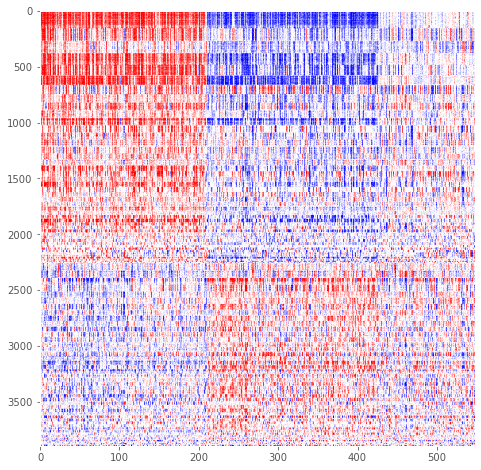

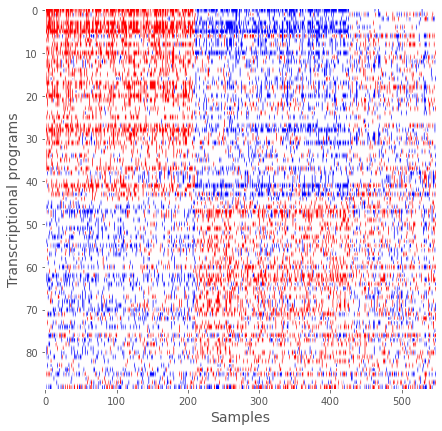

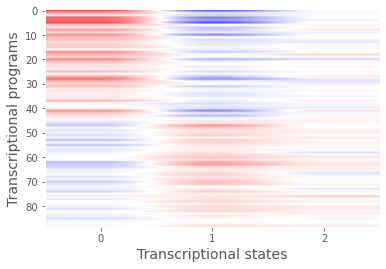

In [42]:
dfr = overExpressedMembersMatrix-underExpressedMembersMatrix
mtrx = dfr.loc[np.hstack(program_list),np.hstack(states)]
plt.figure(figsize=(8,8))
plt.imshow(mtrx,cmap="bwr",vmin=-1,vmax=1,aspect=float(mtrx.shape[1])/float(mtrx.shape[0]))
plt.grid(False)
plt.savefig(os.path.join(resultsDirectory,"mosaic_all.pdf"),bbox_inches="tight")
# Determine activity of transcriptional programs in each sample
statesDf = miner.reduceModules(df=dfr.loc[np.hstack(program_list),np.hstack(states)],programs=program_list,states=states,stateThreshold=0.50,saveFile=os.path.join(resultsDirectory,"transcriptional_programs.pdf"))

# Cluster patients into subtypes and give the activity of each program in each subtype
programsVsStates = miner.programsVsStates(statesDf,states,filename=os.path.join(resultsDirectory,"programs_vs_states.pdf"),showplot=True)

In [81]:
GbmSYGNALData=pd.read_csv("GbmSYGNAL_ResultsOverall.csv",header=0,index_col=False,sep=",")
#for i in range(0, len(GbmSYGNALData.index)-1):
#    GbmSYGNALData.iloc[i,5] = list(map(str, GbmSYGNALData.iloc[i,5].split()))
#GbmSYGNALData = GbmSYGNALData.Genes.apply(pd.Series).merge(GbmSYGNALData, left_index = True, right_index = True).drop(["Genes"], axis = 1).melt(id_vars = ['Bicluster','Regulator', 'RegulatorGeneID','GeneSomaticMutation','SomaticMutationGeneID'], value_name = "Genes").drop("variable", axis = 1).dropna()

#GbmSYGNALData.to_csv('GbmSYGNAL_ResultsOverall.csv', index = False)
GbmMinerMech=pd.read_csv("regulonDfMicroarrayGbm.csv",header=0,sep=",")
GbmMinerCausal=pd.read_csv("completeCausalResults_Microarray_Gbm.csv",header=0,sep=",")
CommonCausalRegPairs = GbmMinerCausal.merge(GbmSYGNALData, left_on = ['Regulator','MutationGene'], right_on = ['Regulator','MutationGene'])
CommonRegMINERSYGNAL = GbmMinerMech.merge(GbmSYGNALData, left_on = ['Regulator'], right_on = ['Regulator'])
CommonCausalRegPairs.to_csv('CommonCausalRegPairsSYGNALMINER.csv', index = False)
CommonRegMINERSYGNAL.to_csv('CommonRegPairsSYGNALMINER.csv', index = False)
CommonMutationMINERSYGNAL = GbmMinerCausal.merge(GbmSYGNALData, left_on = ['MutationGene'], right_on = ['MutationGene'])
CommonRegMINERSYGNAL.to_csv('CommonMutationPairsSYGNALMINER.csv', index = False)
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
x=GbmMinerMech['Regulator'].nunique()
y=GbmSYGNALData['Regulator'].nunique()

x=GbmMinerCausal['MutationGene'].nunique()
y=GbmSYGNALData['MutationGene'].nunique()

commonRegulators = CommonRegMINERSYGNAL[['RegulatorGene']].drop_duplicates()
print(commonRegulators)
commonMutations = CommonMutationMINERSYGNAL[['Mutation']].drop_duplicates()
print(commonMutations)
#Calculate how many TF regulators these common mutations are connected to in MINER

#for i in range(0, len(GbmSYGNALBiCl.index)-1):
#    GbmSYGNALBiCl.iloc[i,1] = list(map(str, GbmSYGNALBiCl.iloc[i,1].split()))
#GbmSYGNALBiCl = GbmSYGNALBiCl.RegulonGene.apply(pd.Series).merge(GbmSYGNALBiCl, left_index = True, right_index = True).drop(["RegulonGene"], axis = 1).melt(id_vars = ['biclusterID'], value_name = "RegulonGene").drop("variable", axis = 1).dropna()
#GbmSYGNALBiCl.to_csv('GbmRelevantSYGNALBiClusters.csv', index = False)

        RegulatorGene
0               CREB1
13756           HNF1A
45791            ELK1
57701           SPDEF
68083            IRX4
75727            E2F4
102523          FOXC1
143718            VDR
162693          GABPA
264795           E2F8
267875          CREB5
269730           ETV7
282028          PRDM1
314896          RUNX1
321072          NFKB1
490791           MAFB
504231         ZNF281
851703           ETV6
859387           NFYA
870203          GATA2
876799           IRF1
1064935        ARID3A
1098055         GATA1
1129834          GLI3
1131934         HOXD3
1134804         KLF12
1136304         SMAD4
1138614          LEF1
1156254         CEBPD
1184289        NFE2L1
1185473        SREBF2
1186435        HOXA10
1189417          XBP1
1193212          KLF1
1199925         IKZF1
1209624         ASCL2
1346747           MGA
1347943          LHX2
1351303         HOXA1
1352521         FOSL1
1365869          ESR1
1367909          RARA
1372481          IRF4
1373561         SATB1
1398849   

0.0 2.017924035297019e-46


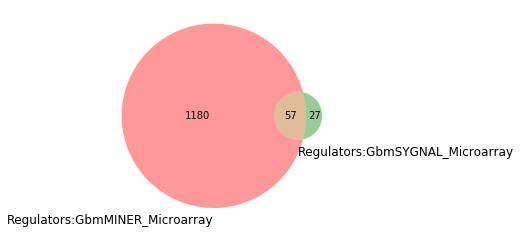

In [90]:
venn2(subsets = (x, y,len(set(list(GbmSYGNALData.Regulator.unique())).intersection(set(list(GbmMinerMech.Regulator.unique()))))), set_labels = ('Regulators:GbmMINER_Microarray', 'Regulators:GbmSYGNAL_Microarray'))
#514 total regulators in both
set1 = set(list(GbmSYGNALData.Regulator.unique()))
set2 = set(list(GbmMinerMech.Regulator.unique()))
           
oddsratio, pvalue = stats.fisher_exact([[514-len(set1.union(set2)), len(set1.difference(set2))], [len(set2.difference(set1)), len(set1.intersection(set2))]])
print(oddsratio, pvalue)

0.0 1.0627350445201907e-05


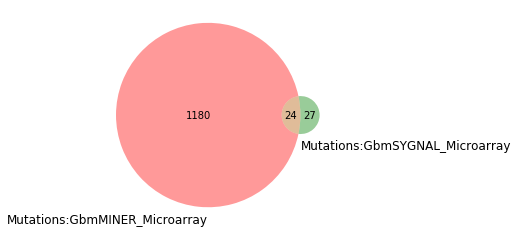

In [89]:
venn2(subsets = (x, y,len(set(list(GbmSYGNALData.MutationGene.unique())).intersection(set(list(GbmMinerCausal.MutationGene.unique()))))), set_labels = ('Mutations:GbmMINER_Microarray', 'Mutations:GbmSYGNAL_Microarray'))
#1183 total somatic mutation related genes
set1 = set(list(GbmSYGNALData.MutationGene.unique()))
set2 = set(list(GbmMinerCausal.MutationGene.unique()))
set2 = {x for x in set2 if pd.notna(x)}
           
oddsratio, pvalue = stats.fisher_exact([[1183-len(set1.union(set2)), len(set1.difference(set2))], [len(set2.difference(set1)), len(set1.intersection(set2))]])
print(oddsratio, pvalue)

In [92]:
GbmMinerMech

Unnamed: 0  Regulon_ID  RegulonNum        Regulator             Gene
0               0           0         122  ENSG00000134954  ENSG00000084652
1               1           0         122  ENSG00000134954  ENSG00000177733
2               2           0         122  ENSG00000134954  ENSG00000143971
3               3           0         122  ENSG00000134954  ENSG00000123143
4               4           0         122  ENSG00000134954  ENSG00000164091
...           ...         ...         ...              ...              ...
69873       69873        5215           5  ENSG00000183072  ENSG00000159348
69874       69874        5215           5  ENSG00000183072  ENSG00000197568
69875       69875        5215           5  ENSG00000183072  ENSG00000173535
69876       69876        5215           5  ENSG00000183072  ENSG00000115325
69877       69877        5215           5  ENSG00000183072  ENSG00000005469

[69878 rows x 5 columns]

In [94]:
GbmSYGNALBiCl=pd.read_csv("GbmRelevantSYGNALBiClusters.csv",header=0,index_col=False,sep=",")
import scipy.stats as stats

regulonlist = list(set(GbmMinerMech['Regulon_ID'].tolist()))
biclusterlist = list(set(GbmSYGNALBiCl['biclusterID'].tolist())) 
intersectionlist = list()
for i in regulonlist:
    for j in biclusterlist:
        list1 = list()
        set1 = GbmSYGNALBiCl[GbmSYGNALBiCl['biclusterID']==j]
        set1 = {x for x in set(set1['RegulonGeneID'].tolist()) if pd.notna(x)}
        set2 = GbmMinerMech[GbmMinerMech['Regulon_ID']==i]
        set2 = {x for x in set(set2['Gene'].tolist()) if pd.notna(x)}
        oddsratio, pvalue = stats.fisher_exact([[10000-len(set1.union(set2)), len(set1.difference(set2))], [len(set2.difference(set1)), len(set1.intersection(set2))]])
        if pvalue<=0.05:
            list1.append(i)
            list1.append(j)
            list1.append(len(set1.union(set2)))
            list1.append(len(set1))
            list1.append(len(set2))
            list1.append(len(set1.intersection(set2)))
            list1.append(pvalue)
            list1.append(oddsratio)
            intersectionlist.append(list1)
df = pd.DataFrame(intersectionlist) 
dfnodup = df.drop_duplicates()
dfnodup.columns = ['Regulon_IDMiner', 'biclusterID', 'UnionOfSet', 'biClusterNum', 'RegulonNum', 'IntersectionNum', 'PValue', 'Oddsratio']
dfnodup.to_csv("GbmSYGNALMINERMicroarrayRegulonIntersections_07132020.csv") 


NameError: name 'intersectionlistAll' is not defined

[3057.11836681]


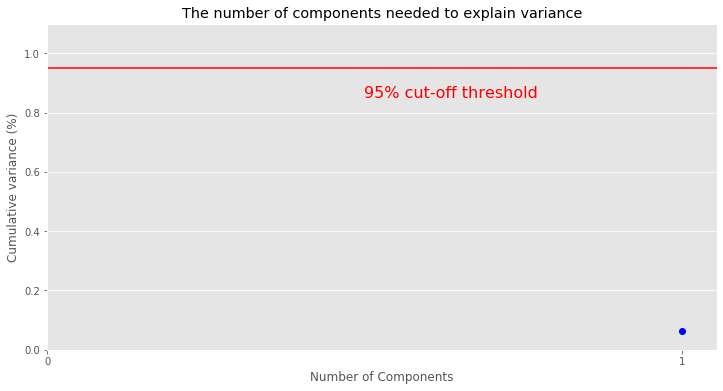

In [122]:
inputDataFile_trial='IA12Zscore.csv'    
## Read expression data and conversion table        
expressionData_trial=pd.read_csv(inputDataFile_trial,header=0,index_col=0,sep=",")

pca = PCA(1, random_state=12)
principalComponents = pca.fit_transform(expressionData_trial.T)
print(pca.explained_variance_)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 2, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 2, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


[0.18675422 0.07981857 0.05996424]


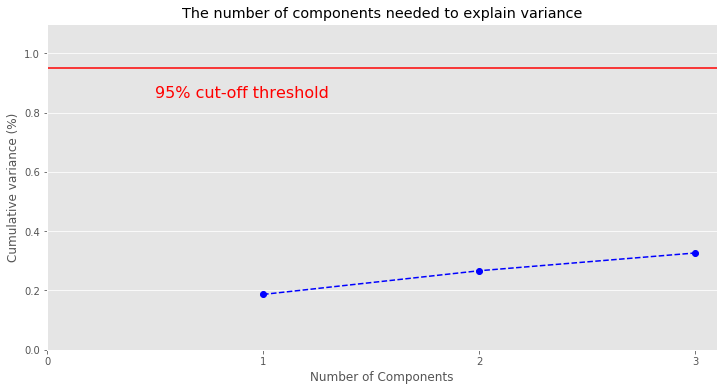

In [46]:
pca = PCA(3, random_state=12)
principalComponents = pca.fit_transform(expressionData.T)
print(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 4, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 4, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()
